In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
def plot(image,image_title,histogram_title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image,cmap="grey")
    plt.title(image_title)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    sns.histplot(image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
    plt.title(histogram_title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

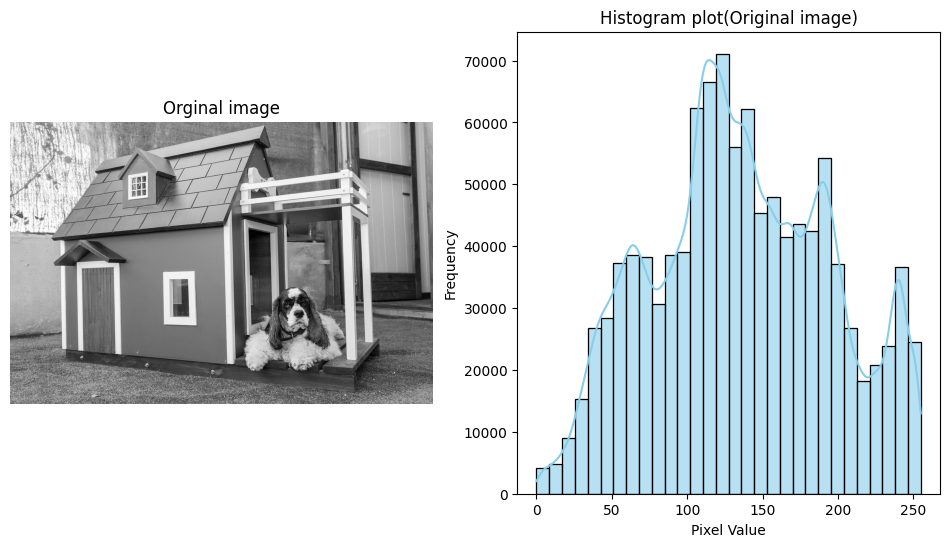

In [25]:
image = cv2.imread('images/tommy.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plot(image_gray,"Orginal image","Histogram plot(Original image)")

### Right Shift

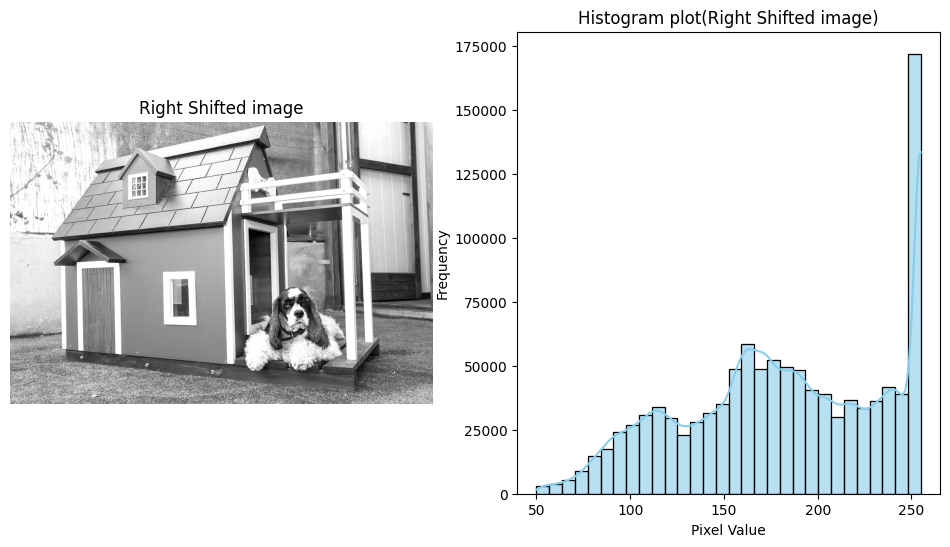

In [26]:
def histogram_right_shift(image, shift_value=50):
  
    shifted = cv2.add(image, shift_value)
    
    return shifted
shifted_image_right = histogram_right_shift(image_gray)
plot(shifted_image_right,"Right Shifted image","Histogram plot(Right Shifted image)")


### Left Shift

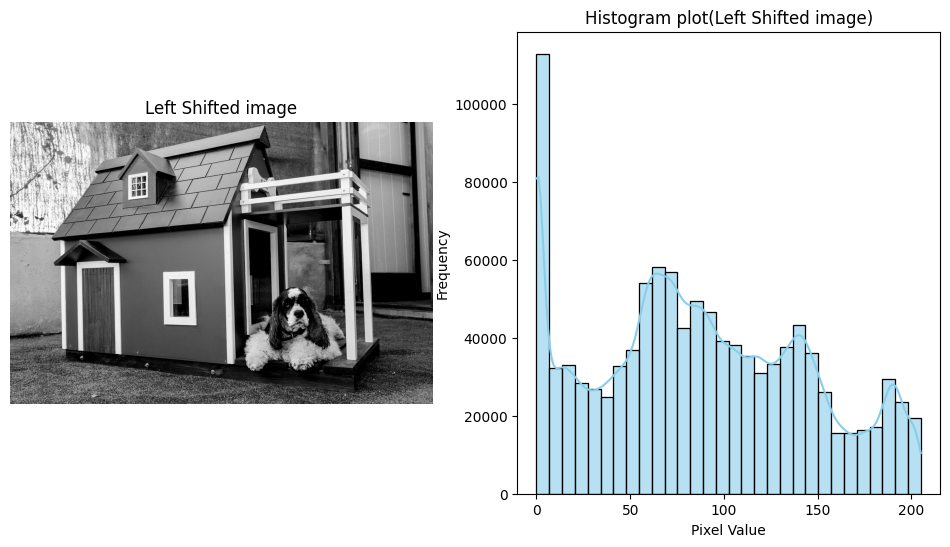

In [27]:
def histogram_left_shift(image, shift_value=-50):
    
    shifted = cv2.subtract(image, abs(shift_value))
    
    return shifted
shifted_image_left = histogram_left_shift(image_gray)
plot(shifted_image_left,"Left Shifted image","Histogram plot(Left Shifted image)")


### Strected image

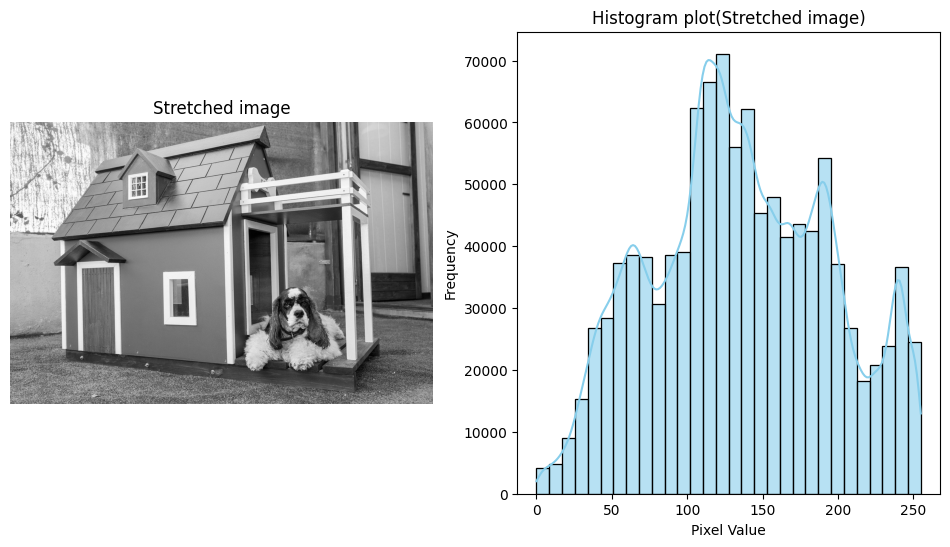

In [28]:
def histogram_stretch(image):
    
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    stretched = ((image - min_pixel) / (max_pixel - min_pixel) * 255).astype(np.uint8)
    
    return stretched
stretched_image = histogram_stretch(image_gray)
plot(stretched_image,"Stretched image","Histogram plot(Stretched image)")

### Smoothed Image 

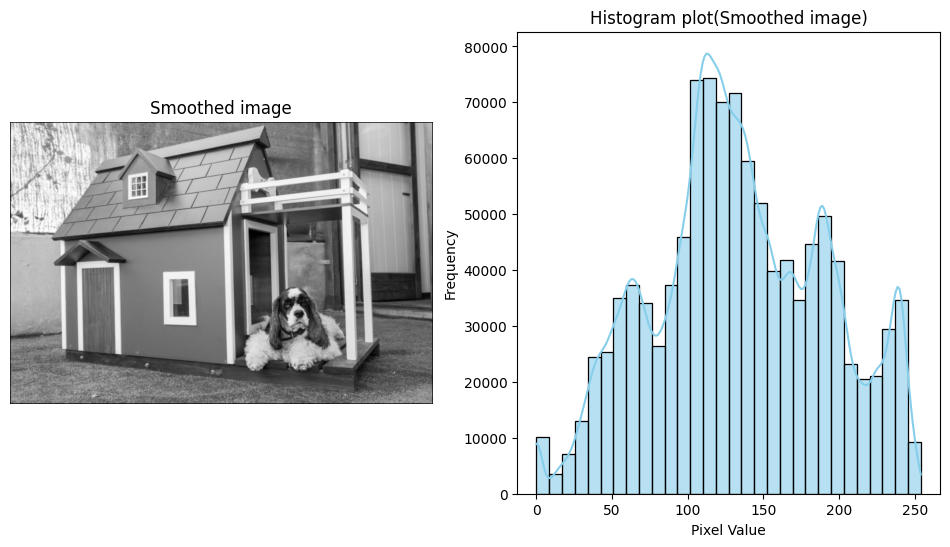

In [29]:
def gaussian_kernel(size, sigma):
    
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(- ((x - (size-1)//2)**2 + (y - (size-1)//2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)

smoothed_image = np.zeros_like(image_gray)

for i in range(2, image_gray.shape[0] - 2):
    for j in range(2, image_gray.shape[1] - 2):
        region = image_gray[i-2:i+3, j-2:j+3]
        smoothed_image[i, j] = np.sum(region * kernel)
plot(smoothed_image,"Smoothed image","Histogram plot(Smoothed image)")

## Blurred Image

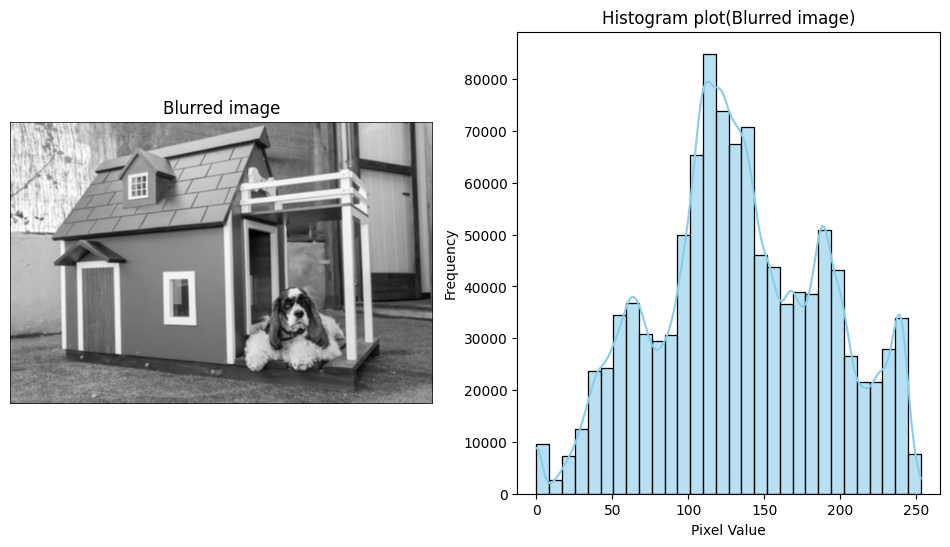

In [30]:
def box_blur(image, kernel_size=5):
    height, width = image.shape
    blurred_image = np.zeros_like(image)

    for i in range(kernel_size//2, height - kernel_size//2):
        for j in range(kernel_size//2, width - kernel_size//2):
            region = image[i - kernel_size//2:i + kernel_size//2 + 1, j - kernel_size//2:j + kernel_size//2 + 1]
            blurred_image[i, j] = np.mean(region)

    return blurred_image

blurred_image = box_blur(image_gray, kernel_size=5)
plot(blurred_image,"Blurred image","Histogram plot(Blurred image)")

### Sharpened Image

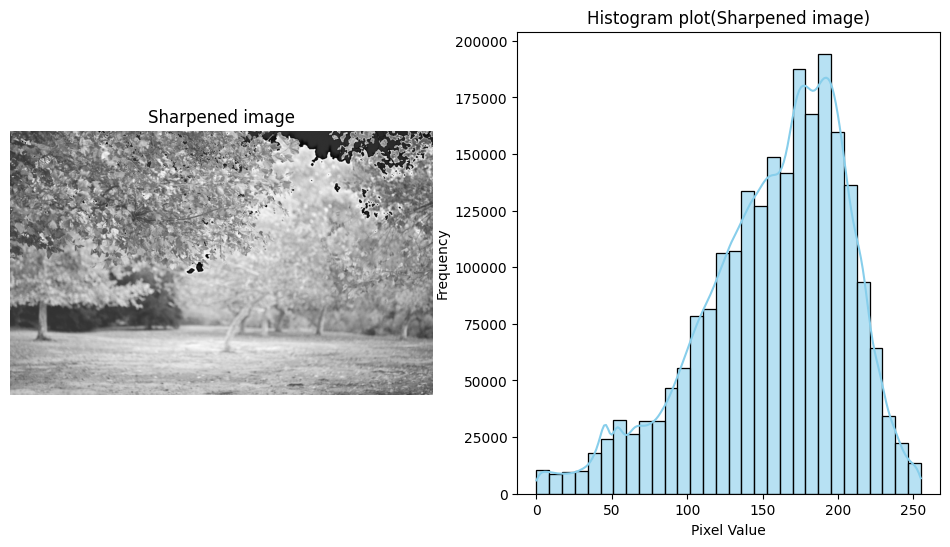

In [31]:
def image_sharpen(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    pad = 1
    sharpened = np.zeros_like(image, dtype=np.float32)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            sharpened[i, j] = np.sum(region * kernel)
    return np.clip(sharpened, 0, 255).astype(np.uint8)
sharpened_image = image_sharpen(image_gray)
plot(brightened_image,"Sharpened image","Histogram plot(Sharpened image)")

## Contrasted Image

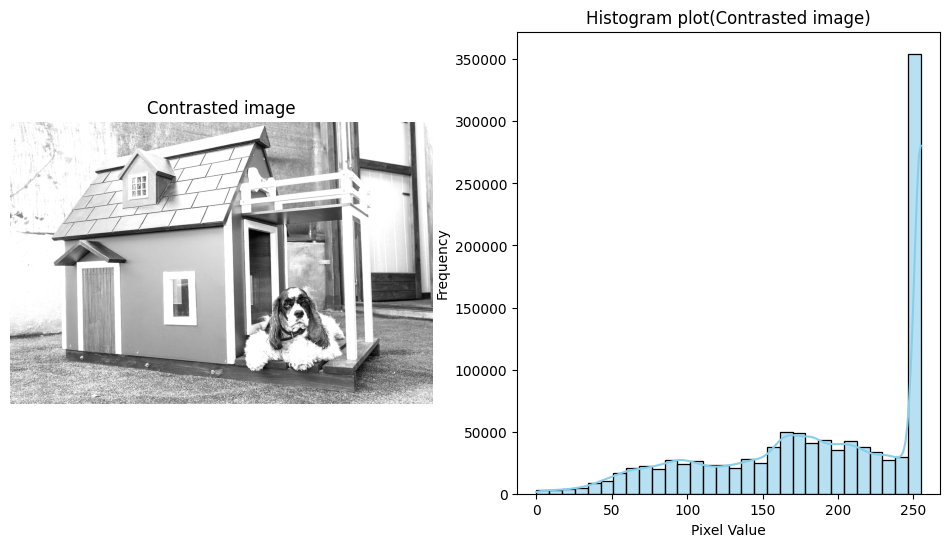

In [32]:
def adjust_contrast(image, alpha=1.5, beta=0):
    contrasted_image = np.zeros_like(image)

  
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
           
            new_value = alpha * image[i, j] + beta

          
            if new_value > 255:
                contrasted_image[i, j] = 255
            elif new_value < 0:
                contrasted_image[i, j] = 0
            else:
                contrasted_image[i, j] = new_value

    return contrasted_image

contrasted_image = adjust_contrast(image_gray, alpha=1.5, beta=0)
plot(contrasted_image,"Contrasted image","Histogram plot(Contrasted image)")

## Thresholded Image

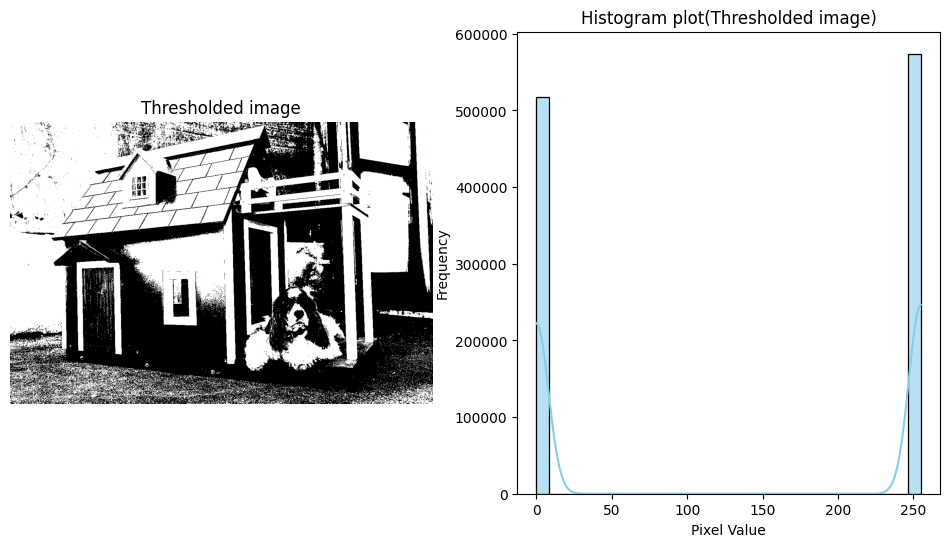

In [33]:

def threshold_image(image, thresh_value=128):
    thresholded_img = np.zeros_like(image)
    thresholded_img[image > thresh_value] = 255
    return thresholded_img

thresholded_image = threshold_image(image_gray)
plot(thresholded_image,"Thresholded image","Histogram plot(Thresholded image)")


## Negative Image

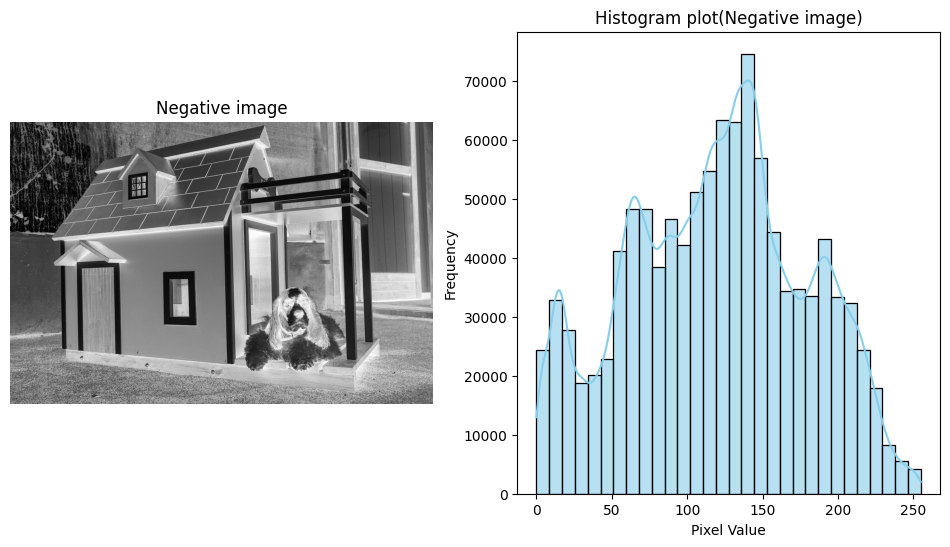

In [34]:

def negative_image(image):
    return 255 - image

negative_img = negative_image(image_gray)

plot(negative_img,"Negative image","Histogram plot(Negative image)")

### Histogram Equalization

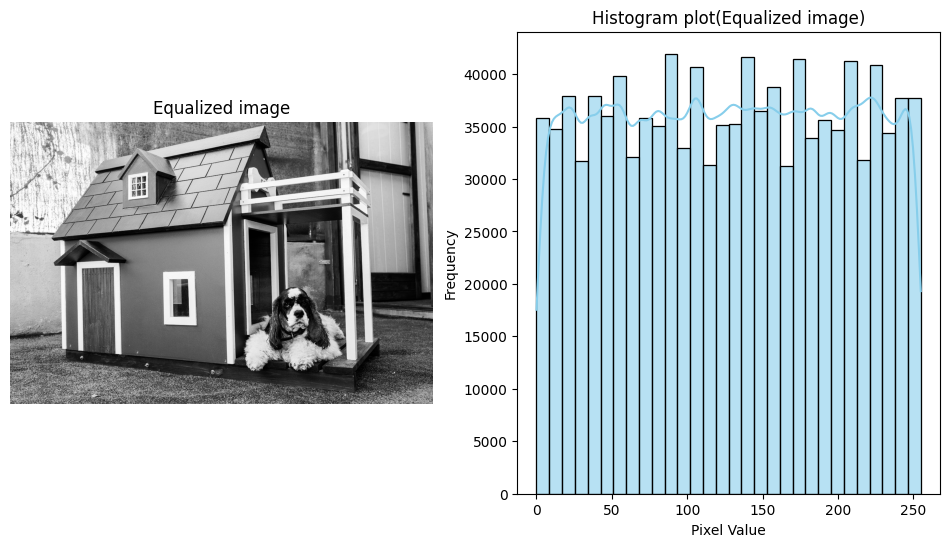

In [35]:
histogram, bins = np.histogram(image_gray.flatten(), bins=256, range=[0, 256])

cdf = histogram.cumsum()  
cdf_min = cdf.min() 
cdf_max = cdf.max() 

cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_normalized = np.round(cdf_normalized).astype(np.uint8)  

equalized_image = cdf_normalized[image_gray] 
plot(equalized_image,"Equalized image","Histogram plot(Equalized image)")

## Magnitude Spectrum (DFT)

DFT for original image


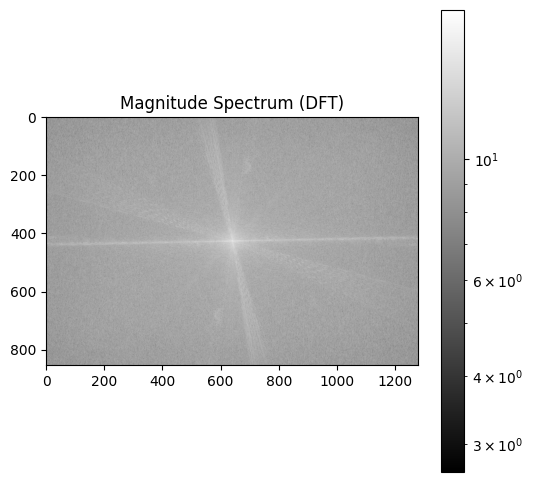

DFT for Equalized image


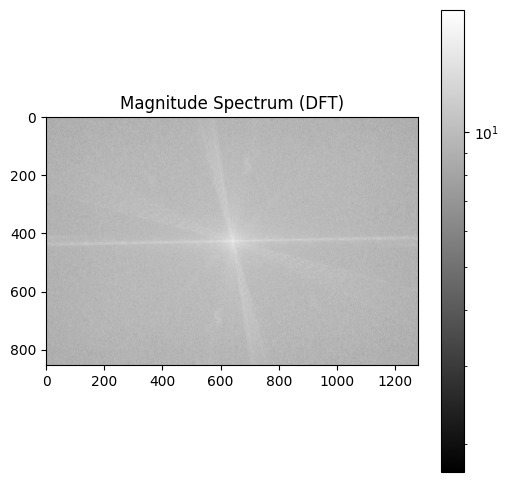

In [38]:
from matplotlib.colors import LogNorm
def plot_dft(image):
  
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    magnitude_spectrum = np.abs(dft_shift)
    
    magnitude_spectrum_log = np.log(magnitude_spectrum + 1)
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude_spectrum_log, cmap='gray', norm=LogNorm())
    plt.title('Magnitude Spectrum (DFT)')
    plt.colorbar()
    plt.show()

print( "DFT for original image")
plot_dft(image_gray)
print( "DFT for Equalized image")
plot_dft(equalized_image)

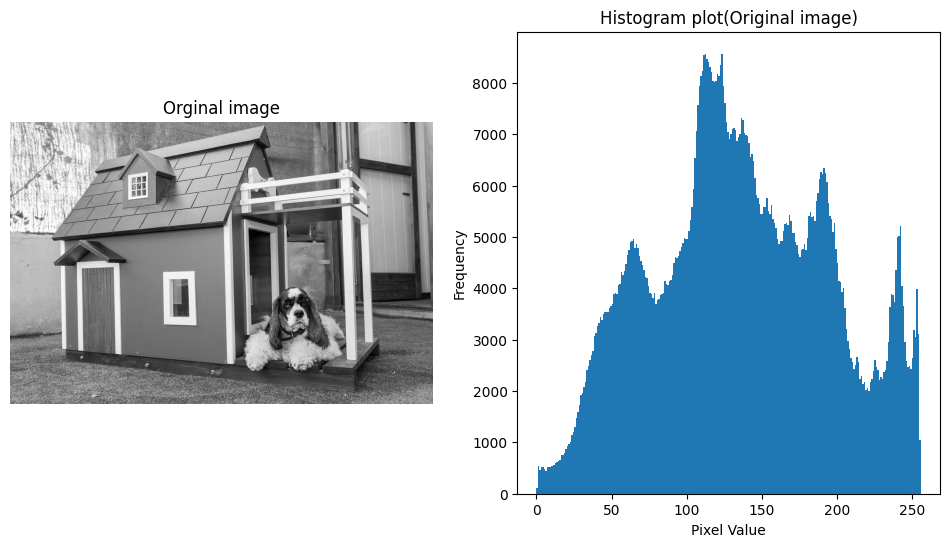

In [12]:
image2 = cv2.imread('images/tommy.jpg', cv2.IMREAD_COLOR)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image_gray2 = cv2.cvtColor(image_rgb2, cv2.COLOR_RGB2GRAY)
plot(image_gray2,"Orginal image","Histogram plot(Original image)")

## IMAGE 2

### Smoothed Image

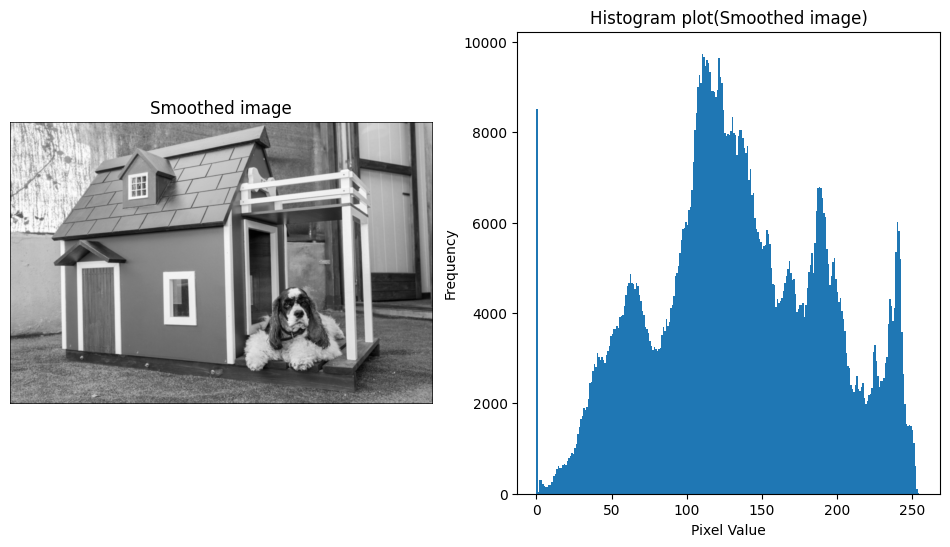

In [13]:
kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)

smoothed_image = np.zeros_like(image_gray2)

for i in range(2, image_gray2.shape[0] - 2):
    for j in range(2, image_gray2.shape[1] - 2):
        region = image_gray2[i-2:i+3, j-2:j+3]
        smoothed_image[i, j] = np.sum(region * kernel)
plot(smoothed_image,"Smoothed image","Histogram plot(Smoothed image)")

### Blured Image

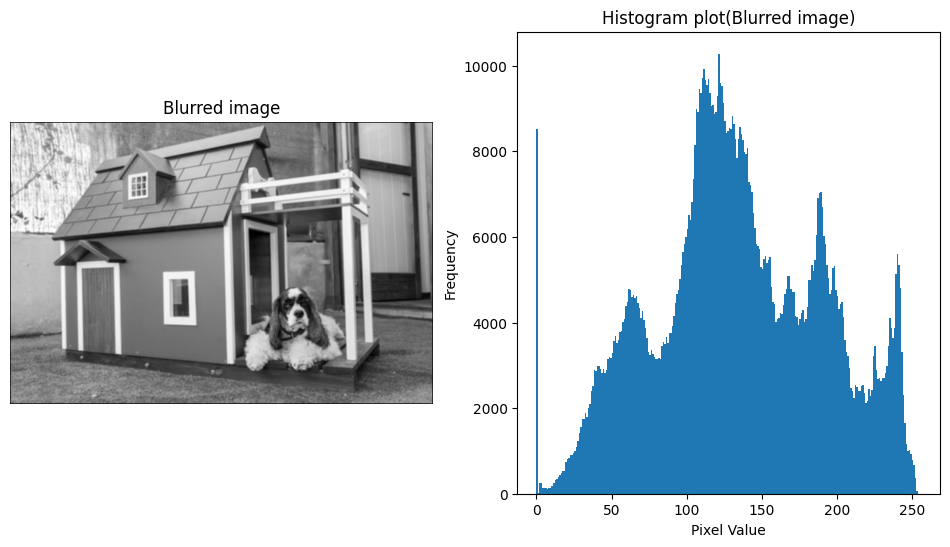

In [14]:
blurred_image = box_blur(image_gray2, kernel_size=5)
plot(blurred_image,"Blurred image","Histogram plot(Blurred image)")

### Brightened Image

C:\Users\dhaya\AppData\Local\Temp\ipykernel_24792\2414340191.py:5: RuntimeWarning: overflow encountered in scalar add
  new_value = image[i, j] + beta


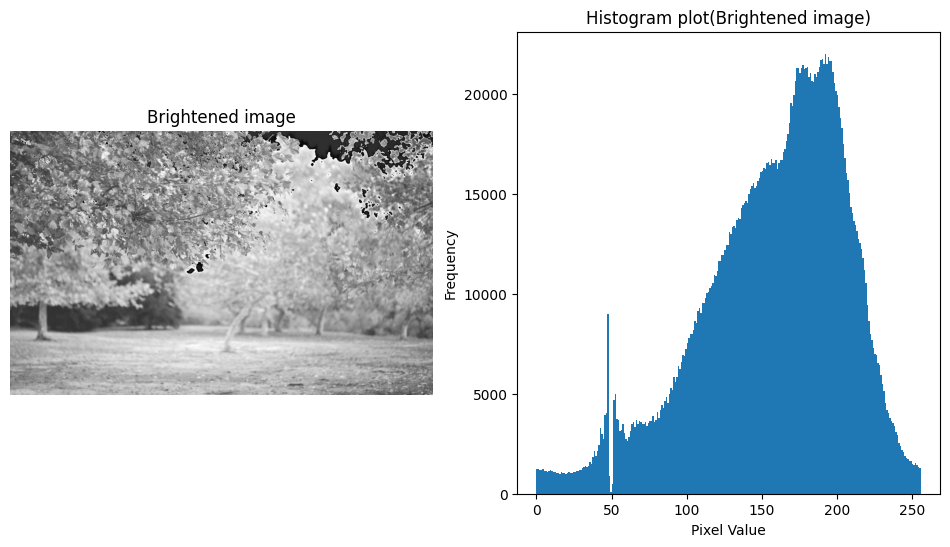

In [15]:
brightened_image = adjust_brightness(image_gray,beta=50)
plot(brightened_image,"Brightened image","Histogram plot(Brightened image)")

### Contrasted Image

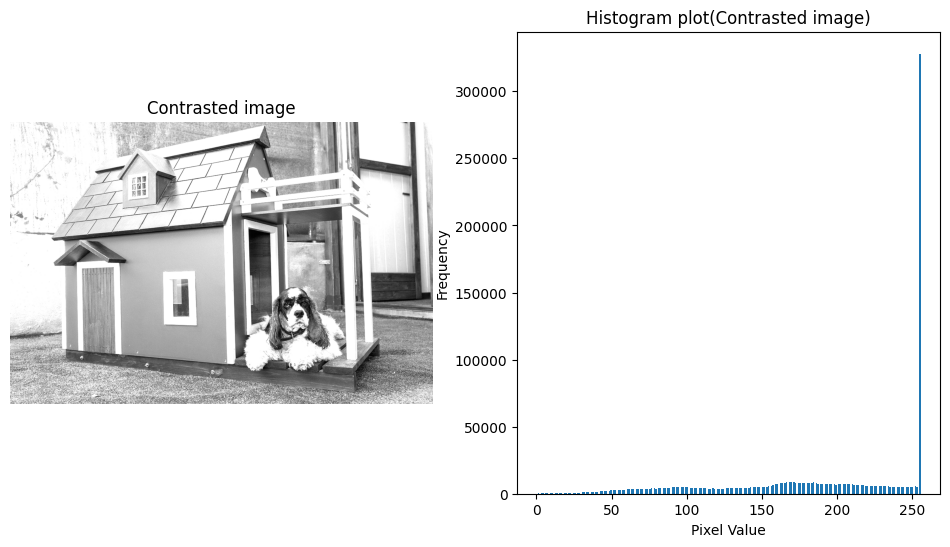

In [16]:
contrasted_image = adjust_contrast(image_gray2, alpha=1.5, beta=0)
plot(contrasted_image,"Contrasted image","Histogram plot(Contrasted image)")

### Thresholded image

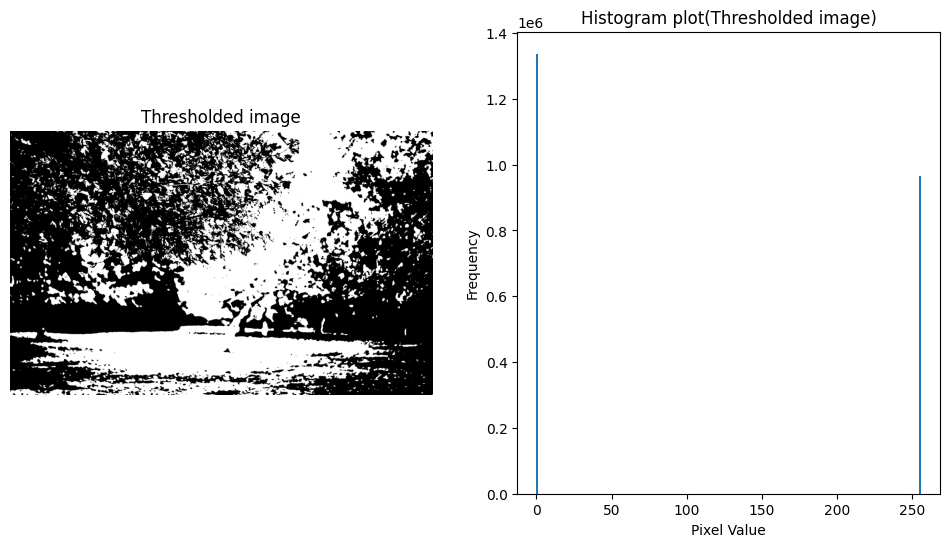

In [17]:
thresholded_image = threshold_image(image_gray)
plot(thresholded_image,"Thresholded image","Histogram plot(Thresholded image)")


### Negative Image

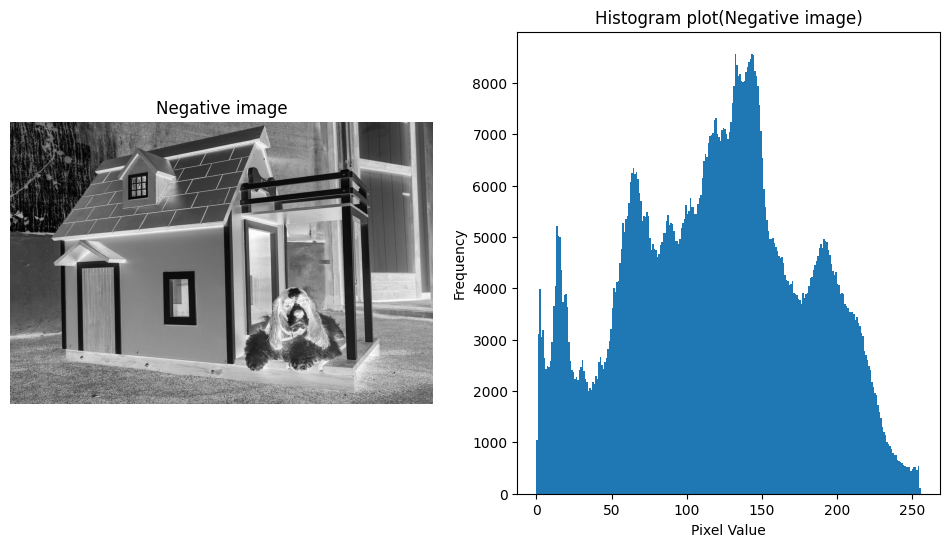

In [18]:
negative_img = negative_image(image_gray2)

plot(negative_img,"Negative image","Histogram plot(Negative image)")

### Mangnitude Spectrum(DFT)

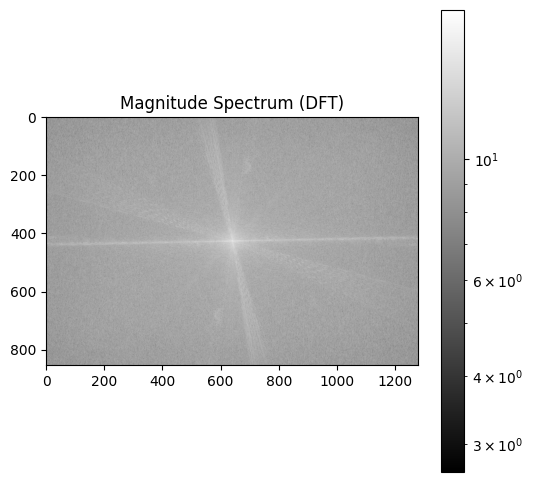

In [19]:
plot_dft(image_gray2)